In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np 
import plotly.express as px 
from textblob import TextBlob 

data = pd.read_csv("Reviews.csv",on_bad_lines='skip')
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
print(data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    6
Text                       0
dtype: int64


In [ ]:
data=data.dropna()
print(data.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164329 entries, 0 to 164345
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      164329 non-null  int64 
 1   ProductId               164329 non-null  object
 2   UserId                  164329 non-null  object
 3   ProfileName             164329 non-null  object
 4   HelpfulnessNumerator    164329 non-null  int64 
 5   HelpfulnessDenominator  164329 non-null  int64 
 6   Score                   164329 non-null  int64 
 7   Time                    164329 non-null  int64 
 8   Summary                 164329 non-null  object
 9   Text                    164329 non-null  object
dtypes: int64(5), object(5)
memory usage: 13.8+ MB


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["Summary"] = data["Summary"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
data['ProductId']=data['ProductId'].fillna('No ProductID Specified')
filtered_countries=pd.DataFrame()
filtered_countries=data['ProductId'].str.split(',',expand=True).stack()
filtered_countries=filtered_countries.to_frame()
filtered_countries.columns=['ProductID']
directors=filtered_countries.groupby(['ProductID']).size().reset_index(name='Total Content')
directors=directors[directors.ProductID !='No ProductID Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='ProductID',title='Top 5 ProductId on Netflix')
fig1.show()

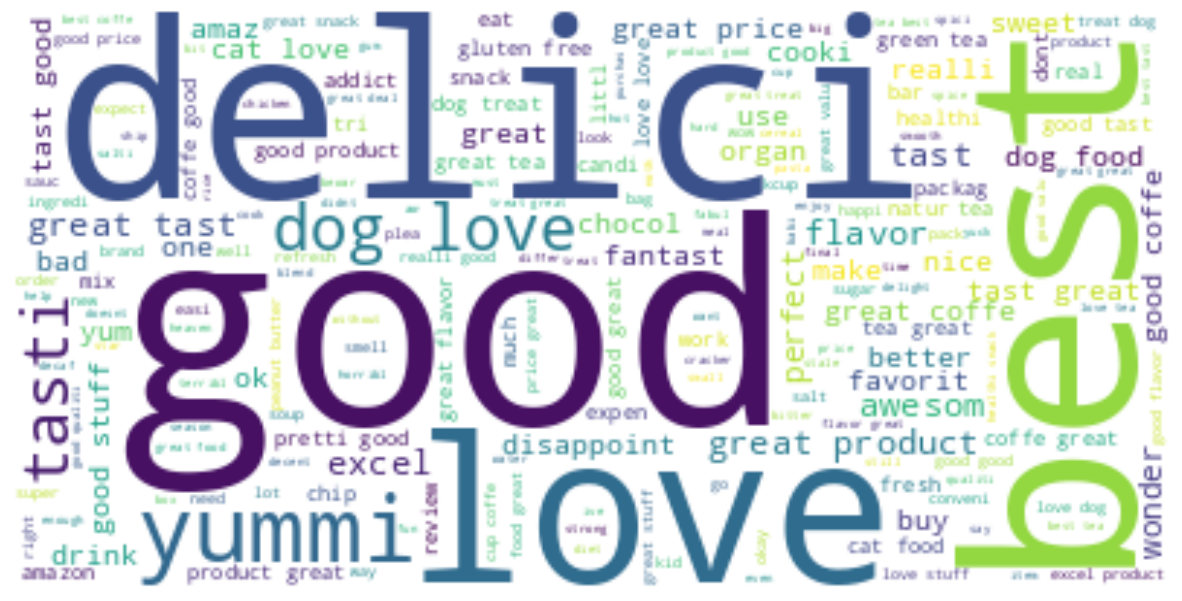

In [ ]:
text = " ".join(i for i in data.Summary)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Summary"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Summary"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Summary"]]
data = data[["Summary", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                 Summary  Positive  Negative  Neutral
0  good qualiti dog food     0.492       0.0    0.508
1               advertis     0.000       0.0    1.000
2            delight say     0.796       0.0    0.204
3          cough medicin     0.000       0.0    1.000
4            great taffi     0.804       0.0    0.196


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  57301.504999973746
Negative:  6814.9649999999865
Neutral:  99727.56499998427
